In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

path = '/content/'  # Update with your directory path

# Listing all files within the path directory
# Store them in a list of strings
file_list = [os.path.join(path, filename) for filename in os.listdir(path) if os.path.isfile(os.path.join(path, filename))]

dataframes = [pd.read_csv(file).sort_values(by='Model').reset_index(drop=True) for file in file_list]
print(file_list[0])
dataframes[0].head(3)

/content/Final_results_all_zeroshot_twitter-financial-news-sentiment.csv


,Model,Accuracy,F1,Precision,Recall,MCC,kappa
0,ALBERT,0.858021,0.856201,0.830576,0.801038,0.724465,0.723498
1,"Albert,GPT2,Pythia",0.872834,0.875116,0.880616,0.872834,0.757623,0.755442
2,BART-base,0.876188,0.876531,0.839879,0.846520,0.765595,0.765541


In [2]:
datasets_names = []
for file in file_list:
    start = file.find("Final_results_all_") + 18
    end = file.find(".csv")
    datasets_names.append(file[start:end])

In [3]:
models = list(dataframes[0]['Model'].values)

In [4]:
Acc_df = {'Model':models}
F1_df = {'Model':models}
Pre_df = {'Model':models}
Rec_df = {'Model':models}
MCC_df = {'Model':models}
kap_df = {'Model':models}
##################################################
for i, df in enumerate(dataframes):
    acc = df['Accuracy'].values
    f1 = df['F1'].values
    pre = df['Precision'].values
    rec = df['Recall'].values
    mcc = df['MCC'].values
    kap = df['kappa'].values
    ###############################
    Acc_df[datasets_names[i]]=acc
    F1_df[datasets_names[i]]=f1
    Pre_df[datasets_names[i]]=pre
    Rec_df[datasets_names[i]]=rec
    MCC_df[datasets_names[i]]=mcc
    kap_df[datasets_names[i]]=kap
##################################################
Acc_df = pd.DataFrame(Acc_df)
F1_df = pd.DataFrame(F1_df)
Pre_df = pd.DataFrame(Pre_df)
Rec_df = pd.DataFrame(Rec_df)
MCC_df = pd.DataFrame(MCC_df)
kap_df = pd.DataFrame(kap_df)

In [5]:
Acc_df.head()

,Model,zeroshot_twitter-financial-news-sentiment,Sp1786_multiclass-sentiment-analysis,takala-financial_phrasebank_100,NusaX-senti,cardiffnlp_tweet_eval_sent_3_classes,cardiffnlp_tweet_eval_irony_2_classes,US_Airlines,takala-financial_phrasebank_50,takala-financial_phrasebank_66,takala-financial_phrasebank_75,carblacac_twitter-sentiment-analysis_2_classes,climate_sentiment
0,ALBERT,0.858021,0.739441,0.960294,0.893333,0.695771,0.694928,0.841985,0.807428,0.890205,0.916023,0.831724,0.787879
1,"Albert,GPT2,Pythia",0.872834,0.797147,0.970588,0.916667,0.775403,0.797101,0.898452,0.856259,0.924171,0.933398,0.884463,0.838384
2,BART-base,0.876188,0.764046,0.969118,0.900000,0.717919,0.695652,0.854508,0.855571,0.900474,0.948842,0.841104,0.805556
3,"Bart,Albert,GPT2",0.895752,0.831931,0.975000,0.930000,0.802226,0.778261,0.903461,0.900275,0.924171,0.961390,0.891383,0.851010
4,"Bart,Albert,Pythia",0.891001,0.820710,0.975000,0.920000,0.797885,0.791304,0.902095,0.898900,0.920221,0.962355,0.893862,0.853535


## **1. Mean Aggregation**

In [6]:
Accuracy__Mean_results = pd.DataFrame(Acc_df.set_index('Model').mean(axis=1).sort_values(ascending=False)).reset_index()
Accuracy__Mean_results.columns = ['Model', 'Mean']
###############################################################################################################################
F1__Mean_results = pd.DataFrame(F1_df.set_index('Model').mean(axis=1).sort_values(ascending=False)).reset_index()
F1__Mean_results.columns = ['Model', 'Mean']
###############################################################################################################################
Pre__Mean_results = pd.DataFrame(Pre_df.set_index('Model').mean(axis=1).sort_values(ascending=False)).reset_index()
Pre__Mean_results.columns = ['Model', 'Mean']
###############################################################################################################################
Rec__Mean_results = pd.DataFrame(Rec_df.set_index('Model').mean(axis=1).sort_values(ascending=False)).reset_index()
Rec__Mean_results.columns = ['Model', 'Mean']
###############################################################################################################################
MCC__Mean_results = pd.DataFrame(MCC_df.set_index('Model').mean(axis=1).sort_values(ascending=False)).reset_index()
MCC__Mean_results.columns = ['Model', 'Mean']
###############################################################################################################################
kap__Mean_results = pd.DataFrame(kap_df.set_index('Model').mean(axis=1).sort_values(ascending=False)).reset_index()
kap__Mean_results.columns = ['Model', 'Mean']

In [ ]:
Accuracy__Mean_results

In [7]:
All_Means = pd.concat([Accuracy__Mean_results.sort_values(by="Model", ascending=True),
                            F1__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
                            Pre__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
                            Rec__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
                            MCC__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
                            kap__Mean_results.sort_values(by="Model", ascending=True)['Mean']],axis=1)
All_Means.columns = ['Model', 'Accuracy Mean', 'F1 Mean', 'Precision Mean', 'Recall Mean', 'MCC Mean' ,	'kappa Mean']
All_Means = All_Means.sort_values(by='Accuracy Mean', ascending=False)
#All_Means

In [8]:
import pandas as pd
import math

# Δημιουργούμε το DataFrame All_Means
All_Means = pd.concat([
    Accuracy__Mean_results.sort_values(by="Model", ascending=True),
    F1__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
    Pre__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
    Rec__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
    MCC__Mean_results.sort_values(by="Model", ascending=True)['Mean'],
    kap__Mean_results.sort_values(by="Model", ascending=True)['Mean']
], axis=1)

# Ορίζουμε τα ονόματα των στηλών
All_Means.columns = ['Model', 'Accuracy Mean', 'F1 Mean', 'Precision Mean', 'Recall Mean', 'MCC Mean', 'kappa Mean']

# Κάνουμε sort το DataFrame βάσει της στήλης "Accuracy Mean" (από υψηλότερο προς χαμηλότερο)
All_Means = All_Means.sort_values(by='Accuracy Mean', ascending=False)

# Συνάρτηση για στρογγυλοποίηση προς τα πάνω με 3 δεκαδικά
def round_up_3_decimals(x):
    return math.ceil(x * 1000) / 1000

# Εφαρμόζουμε τη στρογγυλοποίηση σε όλες τις αριθμητικές στήλες εκτός από τη στήλη "Model"
numeric_columns = All_Means.columns[1:]  # Παίρνουμε όλες τις στήλες εκτός από την πρώτη ("Model")
All_Means[numeric_columns] = All_Means[numeric_columns].applymap(round_up_3_decimals)

# Προσθέτουμε τη νέα στήλη με αρίθμηση γραμμών
All_Means.insert(0, 'No', range(1, len(All_Means) + 1))

# Αποθηκεύουμε το DataFrame σε ένα νέο αρχείο CSV
output_file_path = '/content/All_Means.csv'
All_Means.to_csv(output_file_path, index=False)

print(f"Το αρχείο έχει αποθηκευτεί στο {output_file_path}")
All_Means

Το αρχείο έχει αποθηκευτεί στο /content/All_Means.csv


<ipython-input-8-5ec2d29784d4>:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  All_Means[numeric_columns] = All_Means[numeric_columns].applymap(round_up_3_decimals)


,No,Model,Accuracy Mean,F1 Mean,Precision Mean,Recall Mean,MCC Mean,kappa Mean
0,1,"DeBERTa,Albert,GPT2",0.896,0.896,0.898,0.896,0.817,0.816
1,2,"DeBERTa,T5,GPT2",0.895,0.895,0.897,0.895,0.815,0.814
2,3,"DeBERTa,T5,Albert",0.894,0.894,0.897,0.894,0.814,0.813
3,4,"DeBERTa,GPT2,Pythia",0.894,0.894,0.896,0.894,0.814,0.813
4,5,"DeBERTa,Albert,Pythia",0.894,0.894,0.896,0.894,0.814,0.813
5,6,"DeBERTa,T5,Pythia",0.892,0.892,0.894,0.892,0.810,0.809
6,7,"T5,Albert,GPT2",0.889,0.889,0.892,0.889,0.805,0.803
7,8,"Bart,Albert,GPT2",0.888,0.888,0.891,0.888,0.805,0.802
8,9,"T5,Albert,Pythia",0.888,0.887,0.891,0.888,0.803,0.801
9,10,"T5,GPT2,Pythia",0.887,0.887,0.890,0.887,0.803,0.800


**Sorting By Mean**

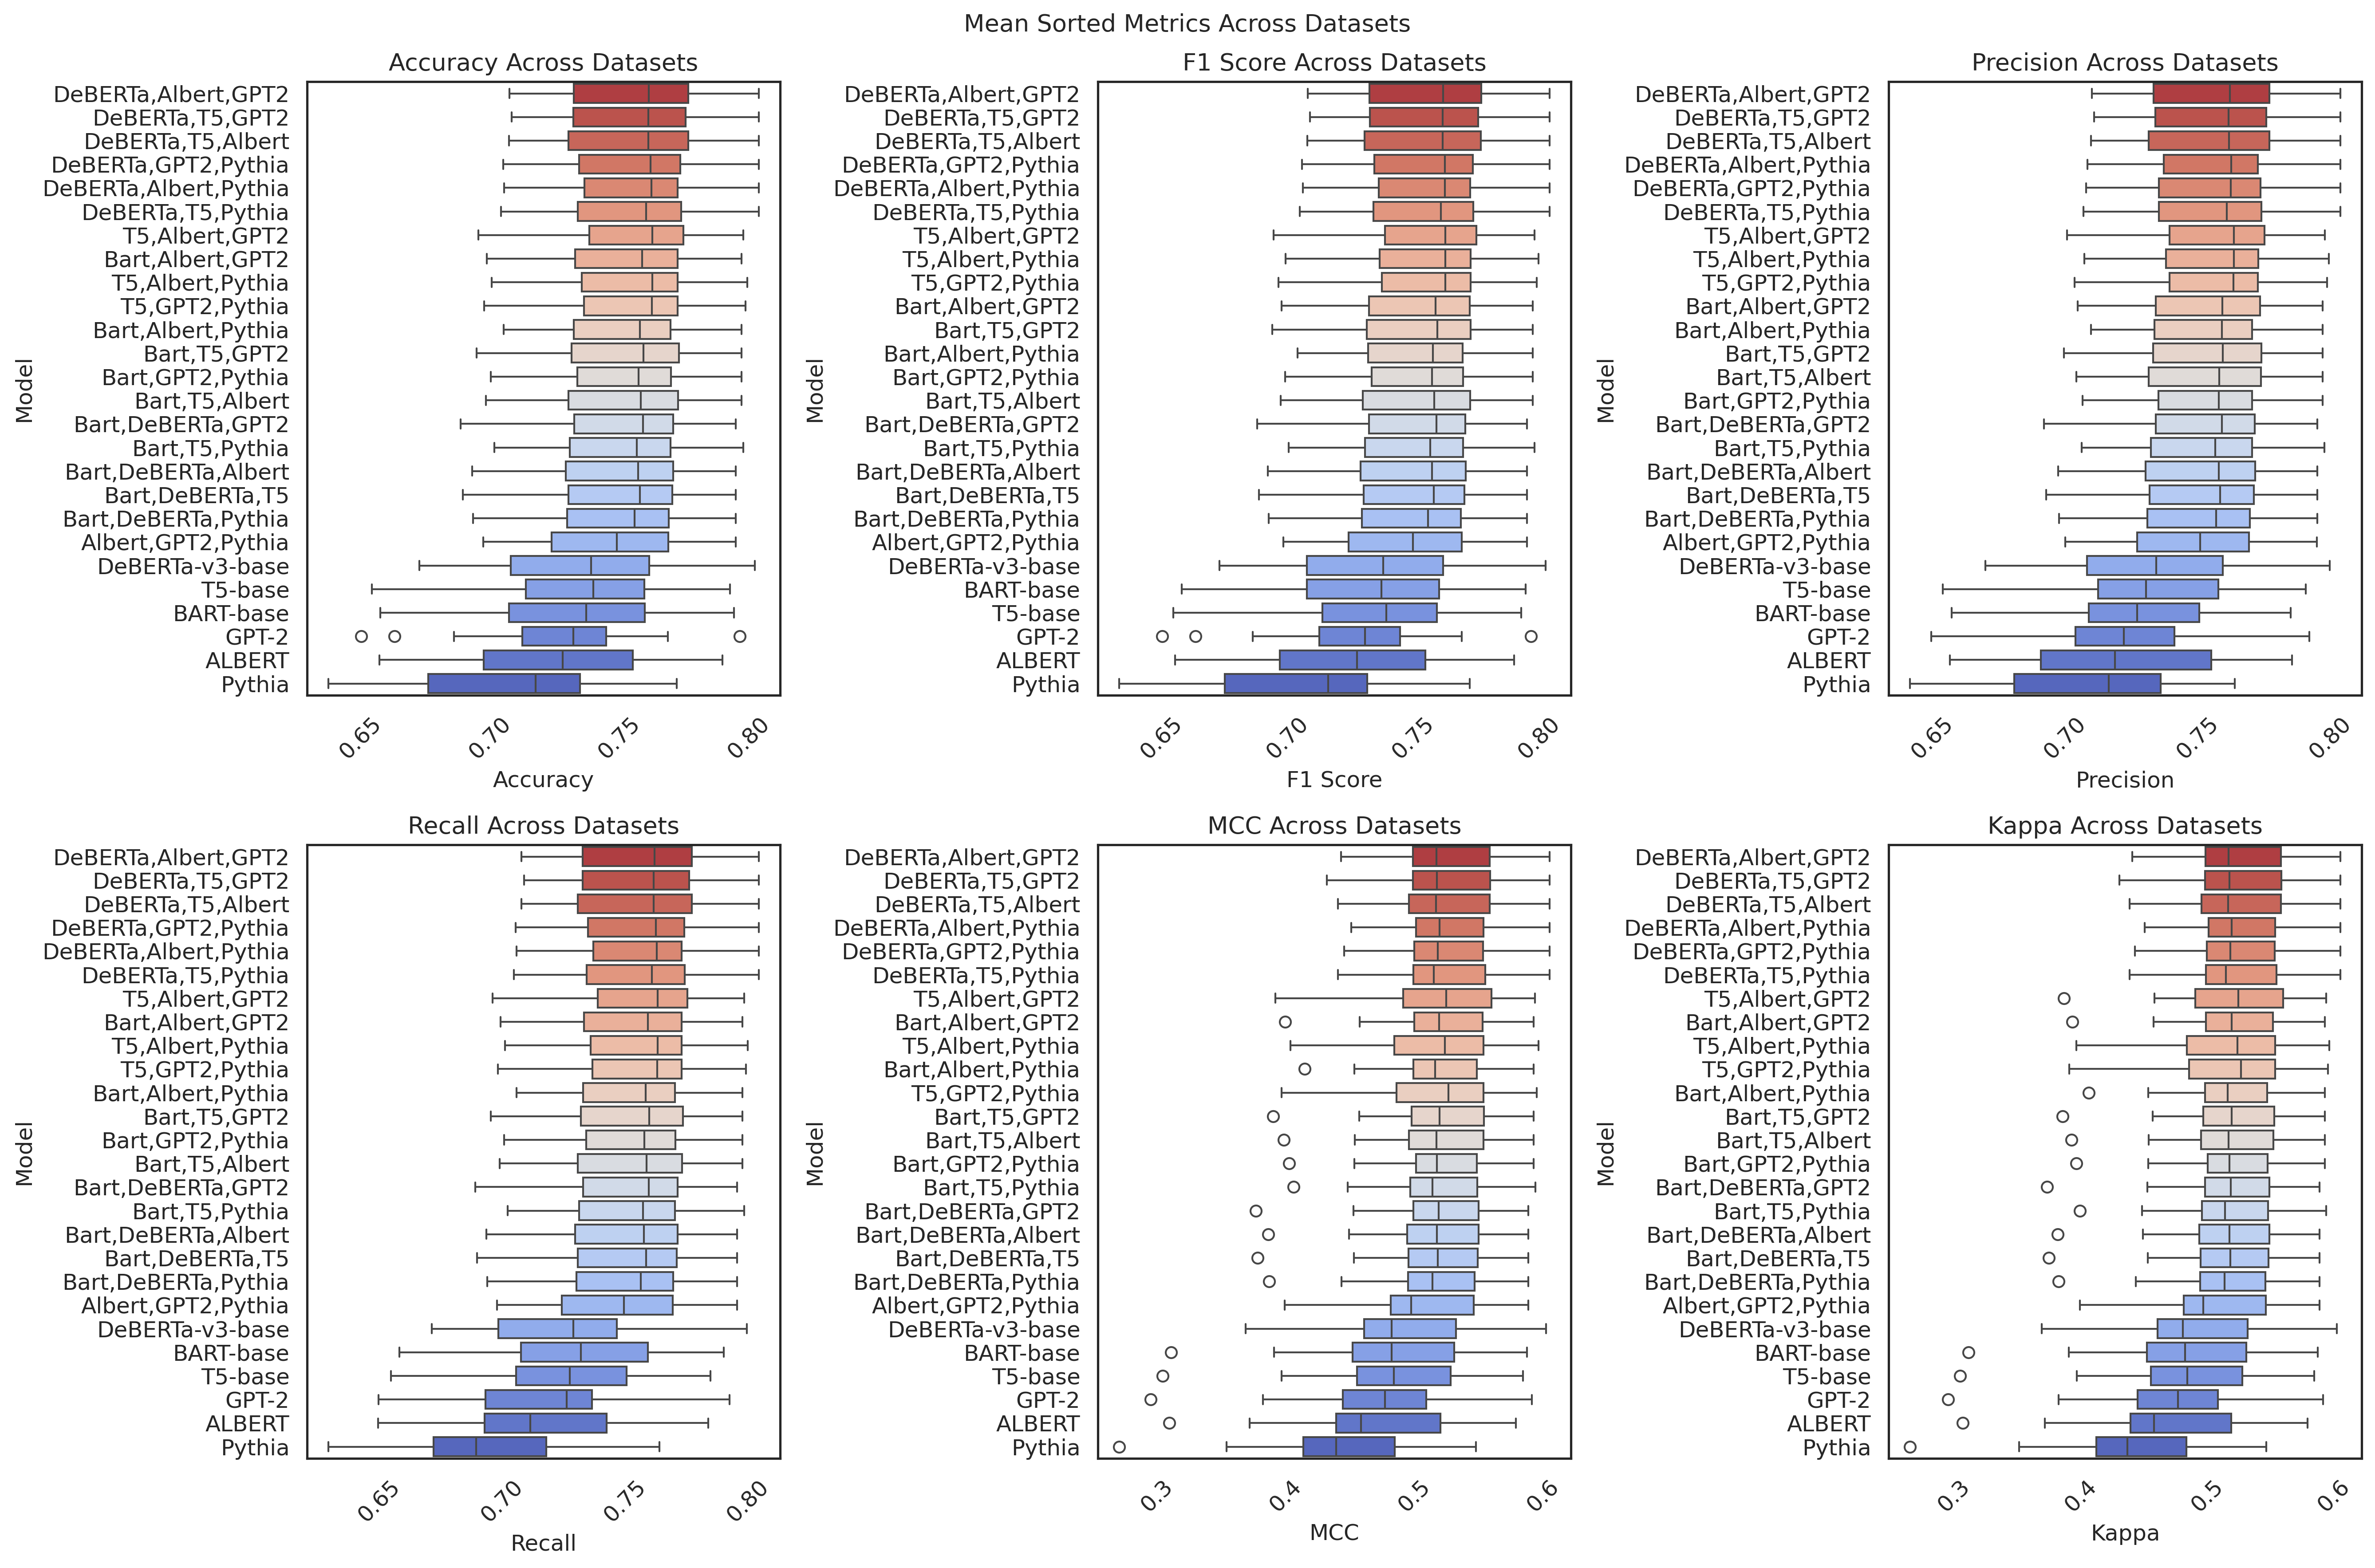

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set minimalistic style with only the 'coolwarm' palette
sns.set(style="white")  # Minimalist background
sns.set_palette("coolwarm")  # Keep the 'coolwarm' palette

# List of dataframes and corresponding metric names
metrics = {
    "Accuracy": Acc_df,
    "F1 Score": F1_df,
    "Precision": Pre_df,
    "Recall": Rec_df,
    "MCC": MCC_df,
    "Kappa": kap_df
}

# Create a figure with a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12), dpi=300)  # 2x3 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through all the metrics and create boxplots
for i, (metric_name, df) in enumerate(metrics.items()):
    ax = axes[i]  # Get the current subplot axis

    # Melt the data for boxplot
    melted_data = pd.melt(df, id_vars=["Model"], var_name="Dataset", value_name=metric_name)

    # Compute the median for each model (to sort the models)
    #median_metric = melted_data.groupby("Model")[metric_name].median().sort_values(ascending=False)

    # Create a list of models sorted by the median
    #sorted_models = median_metric.index

    mean_metric = melted_data.groupby("Model")[metric_name].mean().sort_values(ascending=False)
    sorted_models = mean_metric.index

    # Create the boxplot with sorted models and 'coolwarm' palette
    sns.boxplot(data=melted_data, x=metric_name, y="Model", order=sorted_models, palette='coolwarm_r', ax=ax)

    # Customize the plot for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Rotate labels for readability
    ax.tick_params(axis='y', labelsize=12)  # Increase font size for y-axis

    # Title and axis labels with proper font size
    ax.set_title(f"{metric_name} Across Datasets", fontsize=13)
    ax.set_xlabel(metric_name, fontsize=12)
    ax.set_ylabel("Model", fontsize=12)
clear_output(wait=False)

fig.suptitle("Mean Sorted Metrics Across Datasets", fontsize=13)

# Adjust layout for tight spacing
plt.tight_layout()

# Save the plot as a 2x3 grid image with 300 dpi
plt.savefig("metrics_boxplots_2x3_[MeanSorted].png", dpi=300)

# Show the plot
plt.show()


## **2. Friedman Rankings**

Below is the working prototype for Accuracy

In [21]:
# Extract dataset scores and model names
scores = Acc_df.iloc[:, 1:].values  # Matrix of scores for each model (rows) and dataset (columns)
models = Acc_df["Model"].values  # Model names

# Compute ranks: Higher score gets lower rank (reverse order)
ranks = np.argsort(np.argsort(-scores, axis=0), axis=0) + 1

# Compute average ranks
avg_ranks = np.mean(ranks, axis=1)

# Perform Friedman test
friedman_stat, p_value = friedmanchisquare(*scores.T)

# Display results
#print("Friedman Statistic:", friedman_stat)
#print("P-value:", p_value)
#print("Average Ranks:\n", pd.DataFrame({"Model": models, "Accuracy Avg F-Rank": avg_ranks}).sort_values("Accuracy Avg F-Rank").reset_index())
Acc_Fried = pd.DataFrame({"Model": models, "Accuracy Avg F-Rank": avg_ranks}).sort_values("Accuracy Avg F-Rank").reset_index()
Acc_Fried

,index,Model,Accuracy Avg F-Rank
0,17,"DeBERTa,T5,GPT2",5.333333
1,13,"DeBERTa,Albert,GPT2",5.666667
2,16,"DeBERTa,T5,Albert",6.750000
3,15,"DeBERTa,GPT2,Pythia",7.250000
4,14,"DeBERTa,Albert,Pythia",7.750000
5,18,"DeBERTa,T5,Pythia",8.083333
6,3,"Bart,Albert,GPT2",8.916667
7,22,"T5,Albert,GPT2",9.000000
8,23,"T5,Albert,Pythia",9.583333
9,24,"T5,GPT2,Pythia",9.916667


**Below is the general script for all metrics**

In [22]:

def compute_friedman_ranks(df, score_columns, metric_name, model_column="Model"):
    # Extract dataset scores and model names
    scores = df.iloc[:, score_columns].values  # Matrix of scores for each model (rows) and dataset (columns)
    models = df[model_column].values  # Model names

    # Compute ranks: Higher score gets lower rank (reverse order)
    ranks = np.argsort(np.argsort(-scores, axis=0), axis=0) + 1

    # Compute average ranks
    avg_ranks = np.mean(ranks, axis=1)

    # Perform Friedman test
    friedman_stat, p_value = friedmanchisquare(*scores.T)

    # Prepare the result DataFrame with average ranks sorted
    friedman_result = pd.DataFrame({"Model": models, f"{metric_name} Avg F-Rank": avg_ranks}) \
        .sort_values(f"{metric_name} Avg F-Rank") \
        .reset_index(drop=False)

    return friedman_result, friedman_stat, p_value


# Apply this function for each dataset

# Example for Acc_df (replace with the appropriate DataFrame names)
Acc_Fried, Acc_friedman_stat, Acc_p_value = compute_friedman_ranks(Acc_df, range(1, Acc_df.shape[1]),'Accuracy')

# For F1_df
F1_Fried, F1_friedman_stat, F1_p_value = compute_friedman_ranks(F1_df, range(1, F1_df.shape[1]),'F1')

# For Pre_df
Pre_Fried, Pre_friedman_stat, Pre_p_value = compute_friedman_ranks(Pre_df, range(1, Pre_df.shape[1]),'Precision')

# For Rec_df
Rec_Fried, Rec_friedman_stat, Rec_p_value = compute_friedman_ranks(Rec_df, range(1, Rec_df.shape[1]),'Recall')

# For MCC_df
MCC_Fried, MCC_friedman_stat, MCC_p_value = compute_friedman_ranks(MCC_df, range(1, MCC_df.shape[1]),'MCC')

# For kap_df
kap_Fried, kap_friedman_stat, kap_p_value = compute_friedman_ranks(kap_df, range(1, kap_df.shape[1]),'kappa')

# Output all results
'''print("Acc_Fried:\n", Acc_Fried)
print("F1_Fried:\n", F1_Fried)
print("Pre_Fried:\n", Pre_Fried)
print("Rec_Fried:\n", Rec_Fried)
print("MCC_Fried:\n", MCC_Fried)
print("kap_Fried:\n", kap_Fried)'''
F1_Fried
Pre_Fried
Rec_Fried
MCC_Fried
kap_Fried
Acc_Fried

,index,Model,Accuracy Avg F-Rank
0,17,"DeBERTa,T5,GPT2",5.333333
1,13,"DeBERTa,Albert,GPT2",5.666667
2,16,"DeBERTa,T5,Albert",6.750000
3,15,"DeBERTa,GPT2,Pythia",7.250000
4,14,"DeBERTa,Albert,Pythia",7.750000
5,18,"DeBERTa,T5,Pythia",8.083333
6,3,"Bart,Albert,GPT2",8.916667
7,22,"T5,Albert,GPT2",9.000000
8,23,"T5,Albert,Pythia",9.583333
9,24,"T5,GPT2,Pythia",9.916667


- **Ranks**: Models are ranked per dataset; higher performance gets a better rank (lower number).
- **Average Ranks**: Aggregate ranks for each model across datasets.
- **Friedman Test**: Checks if there's a significant difference between models.

In [23]:
All_Fried = pd.concat([Acc_Fried,F1_Fried,Pre_Fried,Rec_Fried,MCC_Fried,kap_Fried],axis=1)
All_Fried

,index,Model,Accuracy Avg F-Rank,index,Model,F1 Avg F-Rank,index,Model,Precision Avg F-Rank,index,Model,Recall Avg F-Rank,index,Model,MCC Avg F-Rank,index,Model,kappa Avg F-Rank
0,17,"DeBERTa,T5,GPT2",5.333333,17,"DeBERTa,T5,GPT2",5.416667,13,"DeBERTa,Albert,GPT2",4.916667,17,"DeBERTa,T5,GPT2",5.333333,17,"DeBERTa,T5,GPT2",5.666667,13,"DeBERTa,Albert,GPT2",5.166667
1,13,"DeBERTa,Albert,GPT2",5.666667,13,"DeBERTa,Albert,GPT2",5.500000,17,"DeBERTa,T5,GPT2",5.083333,13,"DeBERTa,Albert,GPT2",5.666667,13,"DeBERTa,Albert,GPT2",5.833333,17,"DeBERTa,T5,GPT2",5.583333
2,16,"DeBERTa,T5,Albert",6.750000,16,"DeBERTa,T5,Albert",6.833333,16,"DeBERTa,T5,Albert",6.416667,16,"DeBERTa,T5,Albert",6.750000,16,"DeBERTa,T5,Albert",7.000000,16,"DeBERTa,T5,Albert",6.916667
3,15,"DeBERTa,GPT2,Pythia",7.250000,15,"DeBERTa,GPT2,Pythia",7.333333,15,"DeBERTa,GPT2,Pythia",7.166667,15,"DeBERTa,GPT2,Pythia",7.250000,15,"DeBERTa,GPT2,Pythia",7.500000,15,"DeBERTa,GPT2,Pythia",7.083333
4,14,"DeBERTa,Albert,Pythia",7.750000,14,"DeBERTa,Albert,Pythia",7.750000,22,"T5,Albert,GPT2",7.916667,14,"DeBERTa,Albert,Pythia",7.750000,3,"Bart,Albert,GPT2",8.416667,14,"DeBERTa,Albert,Pythia",8.250000
5,18,"DeBERTa,T5,Pythia",8.083333,18,"DeBERTa,T5,Pythia",8.166667,14,"DeBERTa,Albert,Pythia",7.916667,18,"DeBERTa,T5,Pythia",8.083333,14,"DeBERTa,Albert,Pythia",8.500000,3,"Bart,Albert,GPT2",8.583333
6,3,"Bart,Albert,GPT2",8.916667,22,"T5,Albert,GPT2",8.333333,18,"DeBERTa,T5,Pythia",8.083333,22,"T5,Albert,GPT2",8.833333,18,"DeBERTa,T5,Pythia",8.750000,18,"DeBERTa,T5,Pythia",8.833333
7,22,"T5,Albert,GPT2",9.000000,3,"Bart,Albert,GPT2",9.166667,23,"T5,Albert,Pythia",8.916667,3,"Bart,Albert,GPT2",9.000000,22,"T5,Albert,GPT2",8.833333,22,"T5,Albert,GPT2",9.083333
8,23,"T5,Albert,Pythia",9.583333,23,"T5,Albert,Pythia",9.166667,24,"T5,GPT2,Pythia",9.500000,23,"T5,Albert,Pythia",9.333333,23,"T5,Albert,Pythia",9.250000,23,"T5,Albert,Pythia",9.333333
9,24,"T5,GPT2,Pythia",9.916667,24,"T5,GPT2,Pythia",9.916667,3,"Bart,Albert,GPT2",9.583333,24,"T5,GPT2,Pythia",9.750000,11,"Bart,T5,GPT2",9.916667,11,"Bart,T5,GPT2",10.166667


In [24]:
# Αποθηκεύουμε το DataFrame All_Fried σε ένα αρχείο CSV
output_file_path = '/content/All_Fried.csv'
All_Fried.to_csv(output_file_path, index=False)

print(f"Το αρχείο έχει αποθηκευτεί στο {output_file_path}")

Το αρχείο έχει αποθηκευτεί στο /content/All_Fried.csv


In [25]:
!pip install scikit-posthocs

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata
from scikit_posthocs import posthoc_nemenyi_friedman
import itertools

# Φόρτωση των δεδομένων
file_path = '/content/All_Fried.csv'
df = pd.read_csv(file_path)

# Επιλογή των στηλών με τα Friedman Avg F-Ranks
metrics = ["Accuracy Avg F-Rank", "F1 Avg F-Rank", "Precision Avg F-Rank", "Recall Avg F-Rank", "MCC Avg F-Rank", "kappa Avg F-Rank"]

# Υπολογισμός του μέσου Friedman rank για κάθε μοντέλο
models = df['Model'].values
avg_ranks = df[metrics].mean(axis=1).values

# Reshape avg_ranks to a 2D array
# This is necessary for posthoc_nemenyi_friedman to work correctly
avg_ranks = avg_ranks.reshape(-1, 1)

# Εκτέλεση του Nemenyi post-hoc test
nemenyi_results = posthoc_nemenyi_friedman(avg_ranks)

# Threshold για στατιστικά σημαντική διαφορά (Critical Difference - CD)
CD = 3.99

# Έλεγχος για στατιστικά σημαντικές διαφορές
significant_differences = []
for (i, model1), (j, model2) in itertools.combinations(enumerate(models), 2):
    # Get the single value from the diff array:
    diff = abs(avg_ranks[i][0] - avg_ranks[j][0])  # Extract single value
    if diff > CD:
        significant_differences.append((model1, model2, diff))

# Ταξινόμηση κατά τη μεγαλύτερη διαφορά
significant_differences.sort(key=lambda x: x[2], reverse=True)

# Εκτύπωση αποτελεσμάτων
print("Statistically significant differences::")
for model1, model2, diff in significant_differences:
    print(f"{model1} vs. {model2} → Differences: {diff:.2f}")

Statistically significant differences::
DeBERTa,T5,GPT2 vs. Pythia → Differences: 20.57
DeBERTa,Albert,GPT2 vs. Pythia → Differences: 20.32
DeBERTa,T5,GPT2 vs. ALBERT → Differences: 19.21
DeBERTa,T5,Albert vs. Pythia → Differences: 19.10
DeBERTa,Albert,GPT2 vs. ALBERT → Differences: 18.96
DeBERTa,GPT2,Pythia vs. Pythia → Differences: 18.61
DeBERTa,T5,GPT2 vs. GPT-2 → Differences: 18.39
DeBERTa,Albert,GPT2 vs. GPT-2 → Differences: 18.14
DeBERTa,Albert,Pythia vs. Pythia → Differences: 17.90
DeBERTa,T5,Albert vs. ALBERT → Differences: 17.74
DeBERTa,T5,Pythia vs. Pythia → Differences: 17.65
DeBERTa,T5,GPT2 vs. T5-base → Differences: 17.31
Bart,Albert,GPT2 vs. Pythia → Differences: 17.25
DeBERTa,GPT2,Pythia vs. ALBERT → Differences: 17.25
DeBERTa,Albert,GPT2 vs. T5-base → Differences: 17.06
DeBERTa,T5,Albert vs. GPT-2 → Differences: 16.92
T5,Albert,GPT2 vs. Pythia → Differences: 16.88
DeBERTa,T5,GPT2 vs. BART-base → Differences: 16.69
DeBERTa,Albert,Pythia vs. ALBERT → Differences: 16.54
T5

In [27]:
# Βρίσκουμε τις μέσες τιμές των Friedman ranks για τα δύο ensembles
rank_DeBERTa_T5_GPT2 = avg_ranks[models.tolist().index("DeBERTa,T5,GPT2")]
rank_DeBERTa_Albert_GPT2 = avg_ranks[models.tolist().index("DeBERTa,Albert,GPT2")]

# Υπολογίζουμε τη διαφορά
difference = abs(rank_DeBERTa_T5_GPT2 - rank_DeBERTa_Albert_GPT2)

# Access the scalar value from the 'difference' array using [0]
print(f"Διαφορά μεταξύ DeBERTa,T5,GPT2 και DeBERTa,Albert,GPT2: {difference[0]:.2f}")

# Έλεγχος αν η διαφορά είναι στατιστικά σημαντική
CD = 3.99  # Critical Difference
# Access the scalar value from the 'difference' array using [0] in the comparison
if difference[0] > CD:
    print("Η διαφορά είναι στατιστικά σημαντική.")
else:
    print("Η διαφορά ΔΕΝ είναι στατιστικά σημαντική.")

Διαφορά μεταξύ DeBERTa,T5,GPT2 και DeBERTa,Albert,GPT2: 0.25
Η διαφορά ΔΕΝ είναι στατιστικά σημαντική.


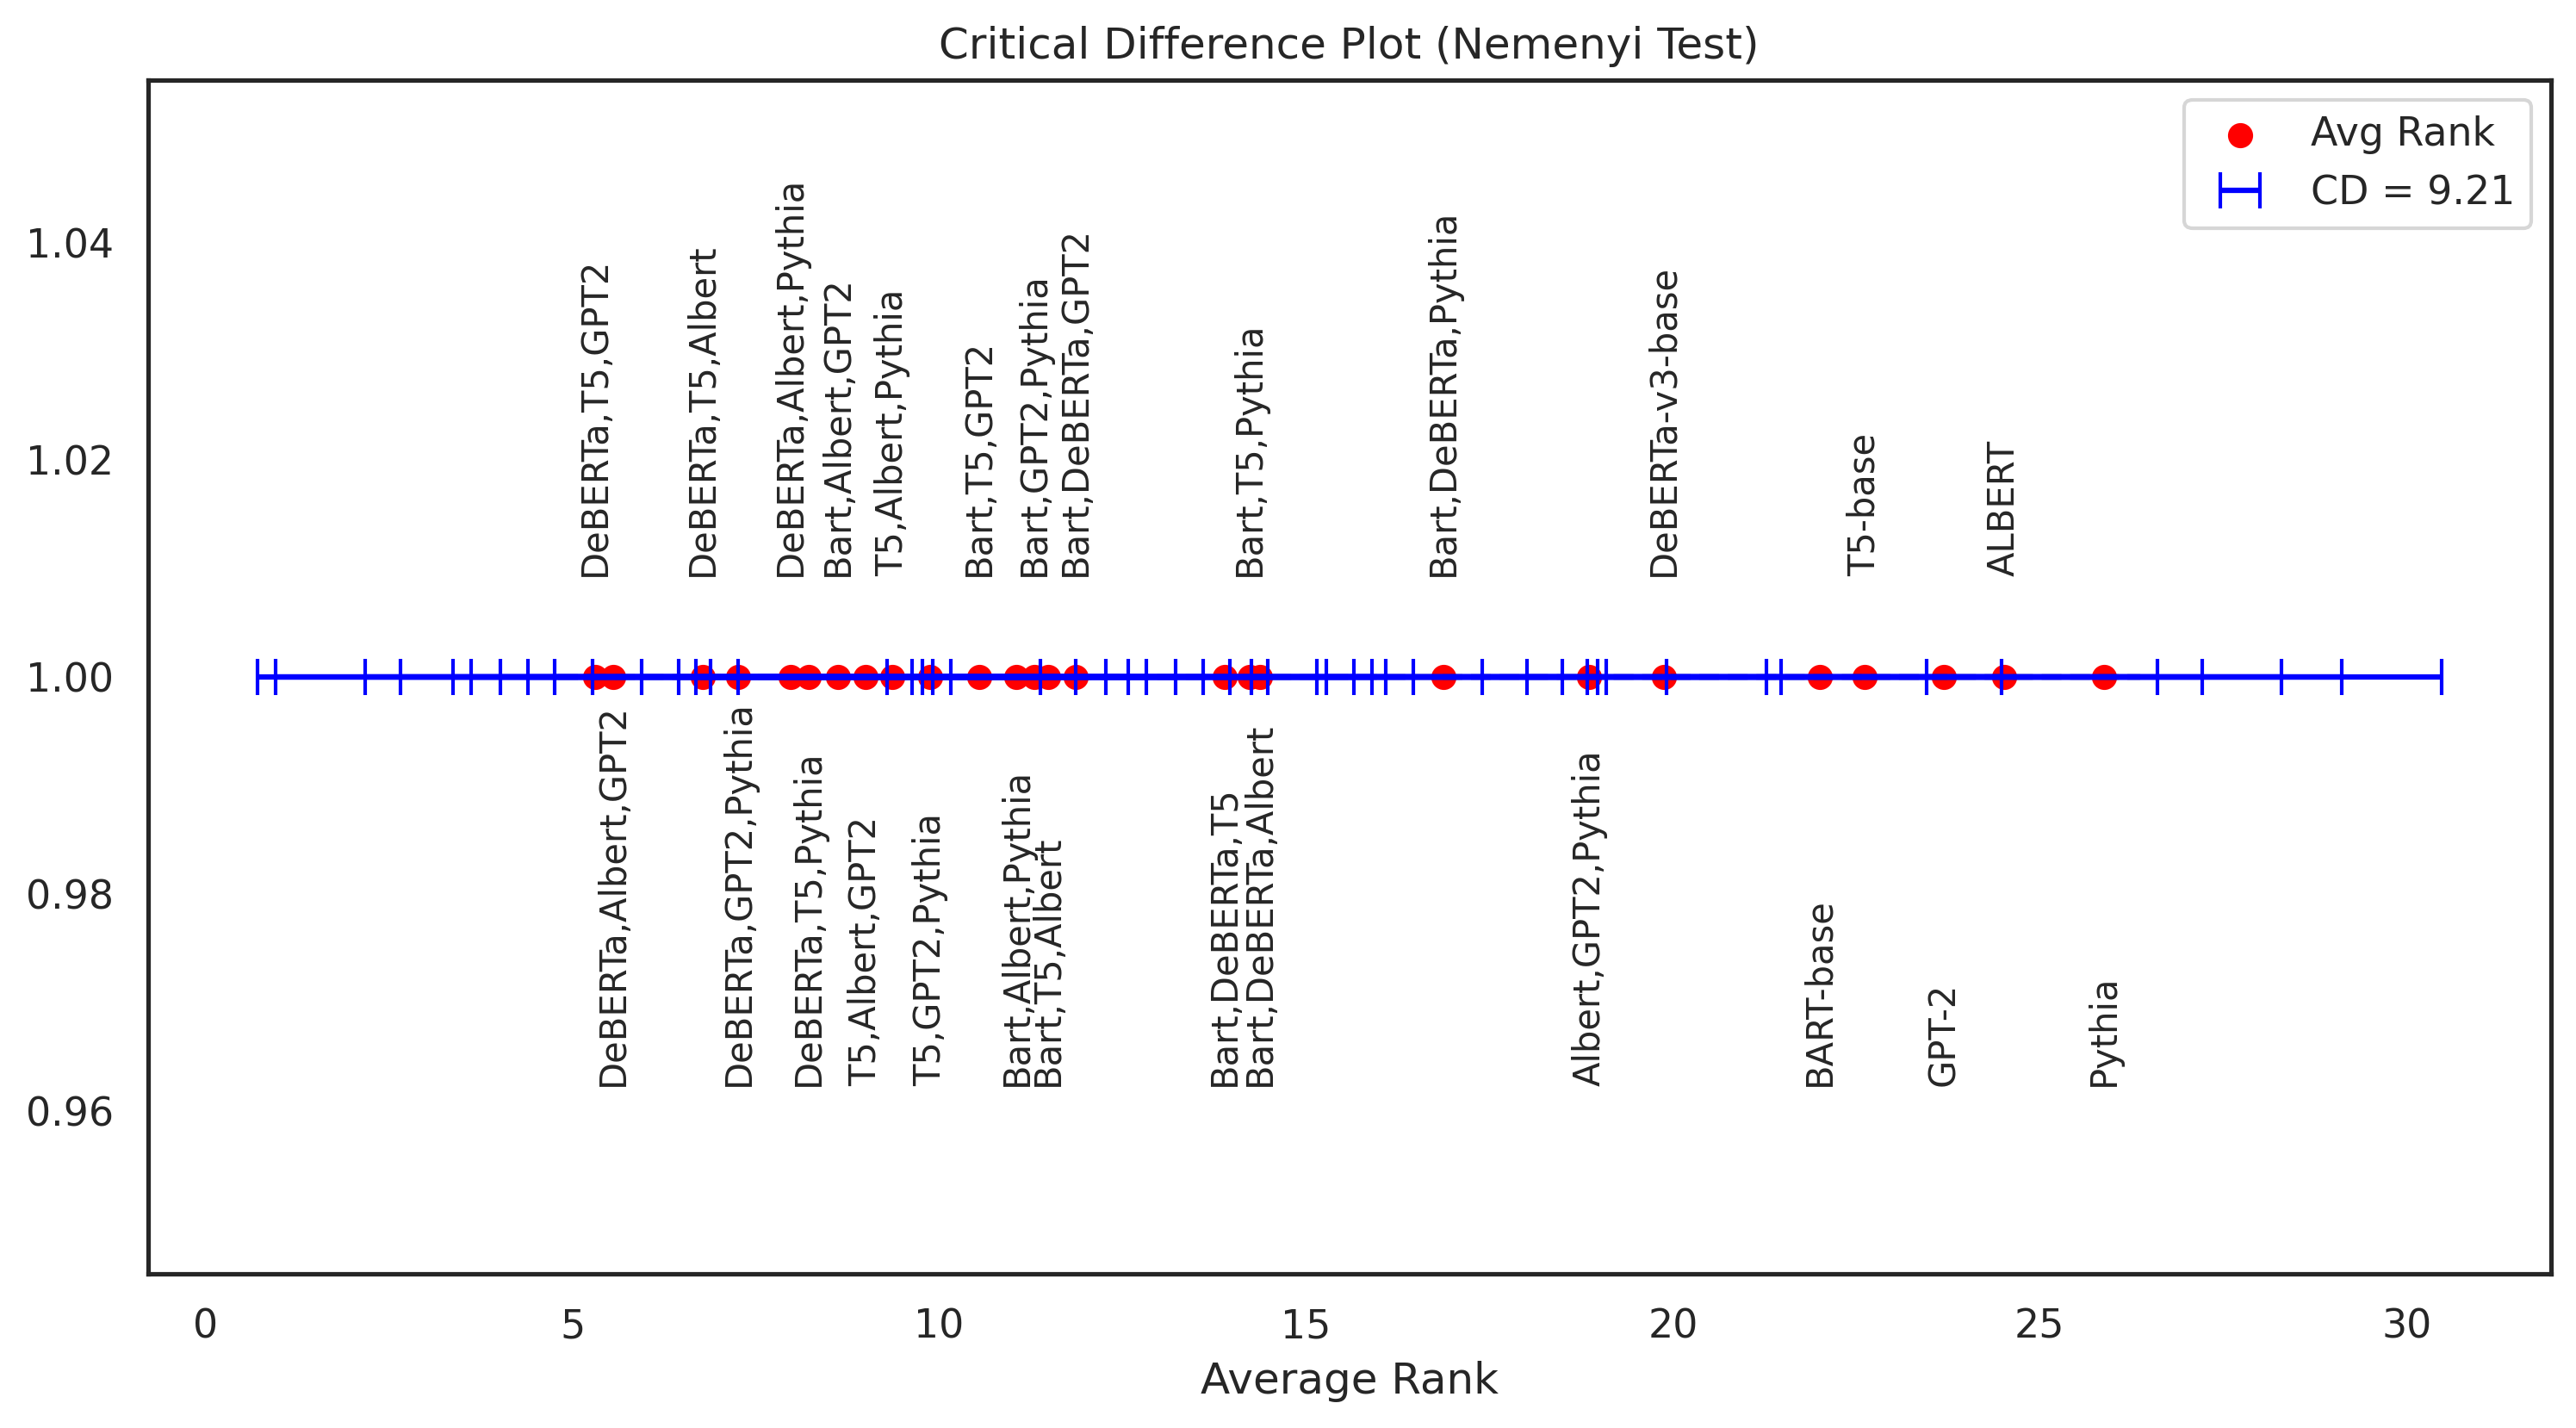

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# Αριθμός μοντέλων και datasets
k = 26  # Αριθμός μοντέλων
N = 12  # Αριθμός datasets

# Υπολογισμός Critical Difference (CD)
q_alpha = 2.948  # Τιμή από τον πίνακα για 26 μοντέλα, p=0.05
CD = q_alpha * np.sqrt(k * (k + 1) / (6 * N))

# Define rank_columns (columns containing the ranks)
rank_columns = ["Accuracy Avg F-Rank", "F1 Avg F-Rank", "Precision Avg F-Rank", "Recall Avg F-Rank", "MCC Avg F-Rank", "kappa Avg F-Rank"]

# Υπολογισμός μέσων κατατάξεων (Avg F-Rank) για κάθε μοντέλο
avg_ranks = df[rank_columns].mean(axis=1)
models = df["Model"]

# Ταξινόμηση βάσει Avg F-Rank
sorted_indices = np.argsort(avg_ranks)
sorted_models = models.iloc[sorted_indices]
sorted_ranks = avg_ranks.iloc[sorted_indices]

# Δημιουργία διαγράμματος υψηλής ανάλυσης
plt.figure(figsize=(12, 6), dpi=300)  # 300dpi για υψηλή ανάλυση
plt.hlines(1, min(sorted_ranks)-0.5, max(sorted_ranks)+0.5, colors="black", linestyles="dashed")
plt.scatter(sorted_ranks, np.ones_like(sorted_ranks), marker="o", color="red", label="Avg Rank")
plt.errorbar(sorted_ranks, np.ones_like(sorted_ranks), xerr=CD / 2, fmt="none", ecolor="blue", capsize=5, label=f"CD = {CD:.2f}")

# Προσθήκη ονομάτων μοντέλων εναλλάξ πάνω-κάτω από τη γραμμή
for i, (rank, model) in enumerate(zip(sorted_ranks, sorted_models)):
    offset = 0.010 if i % 2 == 0 else -0.037  # Μικρότερη απόσταση
    plt.text(rank, 1 + offset, model, rotation=90, ha="center", fontsize=10)

plt.xlabel("Average Rank")
plt.title("Critical Difference Plot (Nemenyi Test)")
plt.legend()
plt.show()


